In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

%matplotlib inline
matplotlib.rc('font', family='NanumGothic')

In [3]:
df=pd.read_csv('유방암.csv', engine='python', encoding='949')
df.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [5]:
df_y=df["diagnosis"]
df_x=df.drop('diagnosis',axis=1,inplace=False)

In [6]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_x,df_y,test_size=0.6,random_state=1234)
df_val_x,df_test_x,df_val_y,df_test_y = train_test_split(df_test_x,df_test_y,test_size=0.5,
                                                                       random_state=1234)

print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('validation data X size : {}'.format(df_val_x.shape))
print('validation data Y size : {}'.format(df_val_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
validation data X size : (171, 30)
validation data Y size : (171,)
test data X size : (171, 30)
test data Y size : (171,)


In [7]:
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)

print('Accuracy on training set:{:.3f}'.format(gb_uncustomized.score(df_train_x,df_train_y)))
print('Accuracy on validation set:{:.3f}'.format(gb_uncustomized.score(df_val_x,df_val_y)))

Accuracy on training set:1.000
Accuracy on validation set:0.942


In [9]:
gb_uncustomized

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1234,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [11]:
train_accuracy=[];val_accuracy=[]
para_lr= [lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb=GradientBoostingClassifier(random_state=1234, learning_rate=v_learning_rate)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    val_accuracy.append(gb.score(df_val_x,df_val_y))
    
df_accuracy_n=pd.DataFrame()
df_accuracy_n['LearningRate']=para_lr
df_accuracy_n['TrainAccuracy']=train_accuracy
df_accuracy_n['ValidationAccuracy']=val_accuracy
df_accuracy_n.round(3).head(5)

,LearningRate,TrainAccuracy,ValidationAccuracy
0,0.1,1.0,0.942
1,0.2,1.0,0.936
2,0.3,1.0,0.936
3,0.4,1.0,0.953
4,0.5,1.0,0.936


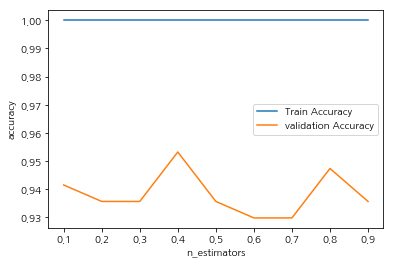

In [12]:
plt.plot(para_lr, train_accuracy, linestyle='-',label='Train Accuracy')
plt.plot(para_lr, val_accuracy, linestyle='-',label='validation Accuracy')
plt.xlabel('n_estimators');plt.ylabel('accuracy')
plt.legend()

In [13]:
learning_rate=0.4

In [15]:
train_accuracy=[];val_accuracy=[]
para_n_tree= [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb=GradientBoostingClassifier(random_state=1234, n_estimators=v_n_estimators, learning_rate= 0.4)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    val_accuracy.append(gb.score(df_val_x,df_val_y))
    
df_accuracy_n=pd.DataFrame()
df_accuracy_n['MinaSamplesLeaf']=para_n_tree
df_accuracy_n['TrainAccuracy']=train_accuracy
df_accuracy_n['ValidationAccuracy']=val_accuracy
df_accuracy_n.round(3).head(5)

,MinaSamplesLeaf,TrainAccuracy,ValidationAccuracy
0,10,1.0,0.942
1,20,1.0,0.942
2,30,1.0,0.953
3,40,1.0,0.953
4,50,1.0,0.953


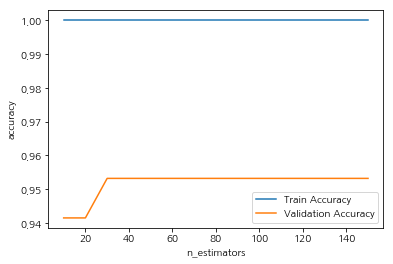

In [16]:
plt.plot(para_n_tree, train_accuracy, linestyle='-',label='Train Accuracy')
plt.plot(para_n_tree, val_accuracy, linestyle='-',label='Validation Accuracy')
plt.xlabel('n_estimators');plt.ylabel('accuracy')
plt.legend()

In [17]:
n_estimators=100

In [19]:
train_accuracy=[];val_accuracy=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb=GradientBoostingClassifier(random_state=1234, max_depth=v_max_depth, n_estimators=100, learning_rate= 0.4)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    val_accuracy.append(gb.score(df_val_x,df_val_y))
    
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth['MinSamplesLeaf']=para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['ValidationAccuracy']=val_accuracy
df_accuracy_depth.round(3).head(5)

,MinSamplesLeaf,TrainAccuracy,ValidationAccuracy
0,1,1.0,0.953
1,2,1.0,0.942
2,3,1.0,0.953
3,4,1.0,0.924
4,5,1.0,0.924


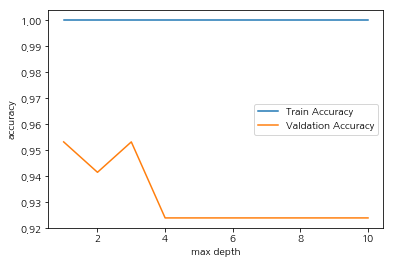

In [20]:
plt.plot(para_depth, train_accuracy, linestyle='-',label='Train Accuracy')
plt.plot(para_depth, val_accuracy, linestyle='-',label='Valdation Accuracy')
plt.xlabel('max depth');plt.ylabel('accuracy')
plt.legend()

In [21]:
max_depth=3

In [22]:
train_accuracy=[];val_accuracy=[]
para_split=[n_split for n_split in range(2, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(random_state=1234, min_samples_split=v_min_samples_split,max_depth=3, n_estimators=100, learning_rate= 0.4)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    val_accuracy.append(gb.score(df_val_x,df_val_y))
    
df_accuracy_split=pd.DataFrame()
df_accuracy_split['MinSamplesplit']=para_split
df_accuracy_split['TrainAccuracy']=train_accuracy
df_accuracy_split['ValidationAccuracy']=val_accuracy
df_accuracy_split.round(3).head(9)

,MinSamplesplit,TrainAccuracy,ValidationAccuracy
0,2,1.0,0.953
1,3,1.0,0.953
2,4,1.0,0.953
3,5,1.0,0.930
4,6,1.0,0.930
5,7,1.0,0.942
6,8,1.0,0.942
7,9,1.0,0.947
8,10,1.0,0.936


<function matplotlib.pyplot.legend(*args, **kwargs)>

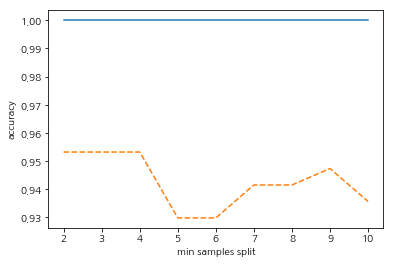

In [23]:
plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, val_accuracy, linestyle='--', label='Validation Accuracy')
plt.xlabel('min samples split'); plt.ylabel('accuracy')
plt.legend

In [30]:
train_accuracy=[];val_accuracy=[]
para_leaf=[n_leaf*10 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(random_state=1234,max_depth=3, min_samples_leaf=v_min_samples_leaf,n_estimators=100, learning_rate= 0.4)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    val_accuracy.append(gb.score(df_val_x,df_val_y))
    
df_accuracy_leaf=pd.DataFrame()
df_accuracy_leaf['MinSamplesplit']=para_leaf
df_accuracy_leaf['TrainAccuracy']=train_accuracy
df_accuracy_leaf['ValidationAccuracy']=val_accuracy
df_accuracy_leaf.round(3).head(9)

,MinSamplesplit,TrainAccuracy,ValidationAccuracy
0,10,1.0,0.930
1,20,1.0,0.953
2,30,1.0,0.947
3,40,1.0,0.965
4,50,1.0,0.965
5,60,1.0,0.965
6,70,1.0,0.965
7,80,1.0,0.965
8,90,1.0,0.947


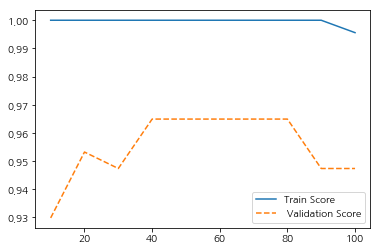

In [31]:
plt.plot(para_leaf, train_accuracy, linestyle='-',label='Train Score')
plt.plot(para_leaf, val_accuracy, linestyle='--',label=' Validation Score')
plt.legend()

In [35]:
gb_final = GradientBoostingClassifier(random_state=1234,max_depth=3, n_estimators= 100, min_samples_leaf=40,  min_samples_split=10, learning_rate= 0.4)
gb_final.fit(df_train_x,df_train_y)
y_pred = gb_final.predict(df_val_x)
print('Accuracy on training set:{:.3f}'.format(gb_final.score(df_train_x,df_train_y)))
print('Accuracy on Validation set:{:.3f}'.format(gb_final.score(df_val_x,df_val_y)))
print('Accuracy on test set:{:.3f}\n'.format(gb_final.score(df_test_x,df_test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(df_val_y,y_pred)))

Accuracy on training set:1.000
Accuracy on Validation set:0.965
Accuracy on test set:0.936

Confusion matrix:
[[114   0]
 [  6  51]]


In [37]:
v_feature_names=df_train_x.columns
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_names
df_importance['Importance']=gb_final.feature_importances_
df_importance.sort_values('Importance',ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
7,mean concave points,0.523
22,worst perimeter,0.330
27,worst concave points,0.052
13,area error,0.026
1,mean texture,0.023
24,worst smoothness,0.023
23,worst area,0.007
21,worst texture,0.005
15,compactness error,0.004
0,mean radius,0.003


Text(0, 0.5, '설명변수')

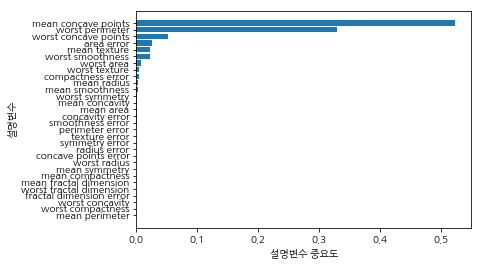

In [38]:
df_importance.sort_values('Importance',ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

In [43]:
estimator=GradientBoostingClassifier(n_estimators=100,random_state=1234)
parm_gird={'max_depth':para_depth, 'learning_rate':para_lr,'min_samples_leaf':para_leaf}

grid_dt=GridSearchCV(estimator,parm_gird,scoring='accuracy',n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print('best estimator model:\n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_dt.best_params_))
print('\nbest score:\n{}'.format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.4, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1234,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

best parameter:
{'learning_rate': 0.4, 'max_depth': 1, 'min_samples_leaf': 30}

best score:
0.978
